In [ ]:
if (!require('caret')) install.packages('caret')
if (!require('glmnet')) install.packages('glmnet')
if (!require('pROC')) install.packages('pROC')
if (!require('ROCR')) install.packages('ROCR')

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: glmnet

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘glmnet’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The fo

In [ ]:
library(glmnet)
library(caret)
library(pROC)
library(ROCR)

Loading required package: Matrix

Loaded glmnet 4.1-8

Loading required package: ggplot2

Loading required package: lattice



In [ ]:
df<-read.csv("/content/demanda_diaria.csv", header=TRUE, dec=",")
str(df)
head(df)

'data.frame':	730 obs. of  16 variables:
 $ indice    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fecha     : chr  "01-01-2018" "02-01-2018" "03-01-2018" "04-01-2018" ...
 $ temporada : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ano       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mes       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ festivo   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ dia       : int  6 0 1 2 3 4 5 6 0 1 ...
 $ laboral   : int  0 0 1 1 1 1 1 0 0 1 ...
 $ clima     : int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : chr  "14.110847" "14.902598" "8.050924" "8.2" ...
 $ atemp     : chr  "18.18125" "17.68695" "9.47025" "10.6061" ...
 $ humedad   : chr  "80.5833" "69.6087" "43.7273" "59.0435" ...
 $ viento    : chr  "10.749882" "16.652113" "16.636703" "10.739832" ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registrado: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ conteo    : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


,indice,fecha,temporada,ano,mes,festivo,dia,laboral,clima,temp,atemp,humedad,viento,casual,registrado,conteo
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,4,04-01-2018,1,0,1,0,2,1,1,8.2,10.6061,59.0435,10.739832,108,1454,1562
5,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.4635,43.6957,12.5223,82,1518,1600
6,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.0008684,88,1518,1606


In [ ]:
df2 <- df[, !names(df) %in% c("indice","fecha","casual","registrados")]
head(df2)

,temporada,ano,mes,festivo,dia,laboral,clima,temp,atemp,humedad,viento,registrado,conteo
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349
4,1,0,1,0,2,1,1,8.2,10.6061,59.0435,10.739832,1454,1562
5,1,0,1,0,3,1,1,9.305237,11.4635,43.6957,12.5223,1518,1600
6,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.0008684,1518,1606


In [ ]:
df2$temp <- as.numeric(df2$temp)
df2$atemp <- as.numeric(df2$atemp)
df2$humedad <- as.numeric(df2$humedad)
df2$viento <- as.numeric(df2$viento)
head(df2)

,temporada,ano,mes,festivo,dia,laboral,clima,temp,atemp,humedad,viento,registrado,conteo
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,654,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,670,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1518,1600
6,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1518,1606


In [ ]:

# Dividir el dataset en entrenamiento (70%) y prueba (20%)
set.seed(159)
train_index <- createDataPartition(df2$conteo, p = 0.70, list = FALSE)
train_data <- df2[train_index, ]
test_data <- df2[-train_index, ]

MODELO PRELIMINAR

In [ ]:
modelo0=lm(conteo~.,data=train_data)
summary(modelo0)


Call:
lm(formula = conteo ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-988.39 -241.30  -30.55  182.35 1538.30 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  506.97968  123.37671   4.109 4.64e-05 ***
temporada    -39.12311   31.05711  -1.260   0.2084    
ano           24.16845   55.06908   0.439   0.6609    
mes           -4.40940    8.92729  -0.494   0.6216    
festivo     -268.06212  117.15926  -2.288   0.0226 *  
dia           21.82303    8.47091   2.576   0.0103 *  
laboral     -986.95107   43.71943 -22.575  < 2e-16 ***
clima        -54.57828   44.14769  -1.236   0.2169    
temp          25.67290   16.17505   1.587   0.1131    
atemp         10.80624   15.03499   0.719   0.4726    
humedad       -2.06881    1.69922  -1.218   0.2240    
viento        -8.03475    3.58363  -2.242   0.0254 *  
registrado     1.16796    0.02489  46.918  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Re

In [ ]:
AIC(modelo0)
pred<-predict(modelo0, train_data, se.fit=TRUE)

RMSE<-sqrt(mean((pred$fit-train_data$conteo)^2))
RMSE

[1] 7592.833

[1] 379.8772

2. Punto

Con datos train

In [ ]:
df3 <- df2[, !names(df2) %in% c("temporada","ano","mes","festivo","clima","atemp","humedad")]
head(df3)

,dia,laboral,temp,viento,registrado,conteo
,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,0,14.110847,10.749882,654,985
2,0,0,14.902598,16.652113,670,801
3,1,1,8.050924,16.636703,1229,1349
4,2,1,8.200000,10.739832,1454,1562
5,3,1,9.305237,12.522300,1518,1600
6,4,1,8.378268,6.000868,1518,1606


In [ ]:
# Dividir el dataset en entrenamiento (70%) y prueba (20%)
set.seed(159)
train_index <- createDataPartition(df3$conteo, p = 0.70, list = FALSE)
train_data <- df3[train_index, ]
test_data <- df3[-train_index, ]

In [ ]:
#festivo, dia, laboral, temp, viento, registrado tiene p-valor<alpha
modelo1=lm(conteo~.,data=train_data)
summary(modelo1)


Call:
lm(formula = conteo ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1082.99  -233.63   -49.16   215.66  1617.65 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  182.18567   78.93306   2.308  0.02139 *  
dia           23.27640    8.49148   2.741  0.00634 ** 
laboral     -983.24337   38.85805 -25.303  < 2e-16 ***
temp          34.53946    2.77946  12.427  < 2e-16 ***
viento        -5.25107    3.38503  -1.551  0.12146    
registrado     1.17586    0.01431  82.182  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 392.6 on 508 degrees of freedom
Multiple R-squared:  0.9588,	Adjusted R-squared:  0.9584 
F-statistic:  2366 on 5 and 508 DF,  p-value: < 2.2e-16


In [ ]:
AIC(modelo1)
pred1<-predict(modelo1, train_data, se.fit=TRUE)

RMSE<-sqrt(mean((pred1$fit-train_data$conteo)^2))
RMSE

[1] 7606.781

[1] 390.3468

R2= 0.958
RMSE=391.46

CON DATOS TEST

In [ ]:
#festivo, dia, laboral, temp, viento, registrado tiene p-valor<alpha
modelo1_test=lm(conteo~.,data=test_data)
summary(modelo1_test)


Call:
lm(formula = conteo ~ ., data = test_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-682.51 -190.97  -40.16  178.09 1863.06 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  292.74427  115.70430   2.530   0.0121 *  
dia           13.53009   12.18877   1.110   0.2682    
laboral     -926.36741   56.17675 -16.490  < 2e-16 ***
temp          30.90145    3.71465   8.319 1.12e-14 ***
viento        -5.42504    4.73948  -1.145   0.2537    
registrado     1.15552    0.01873  61.694  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 337.5 on 210 degrees of freedom
Multiple R-squared:  0.9712,	Adjusted R-squared:  0.9705 
F-statistic:  1416 on 5 and 210 DF,  p-value: < 2.2e-16


In [ ]:
AIC(modelo1_test)
pred2<-predict(modelo1_test, test_data, se.fit=TRUE)

RMSE<-sqrt(mean((pred2$fit-test_data$conteo)^2))
RMSE

[1] 3135.803

[1] 332.7721

R2= 0.9712
RMSE = 332.93

PUNTO 3 - ridge

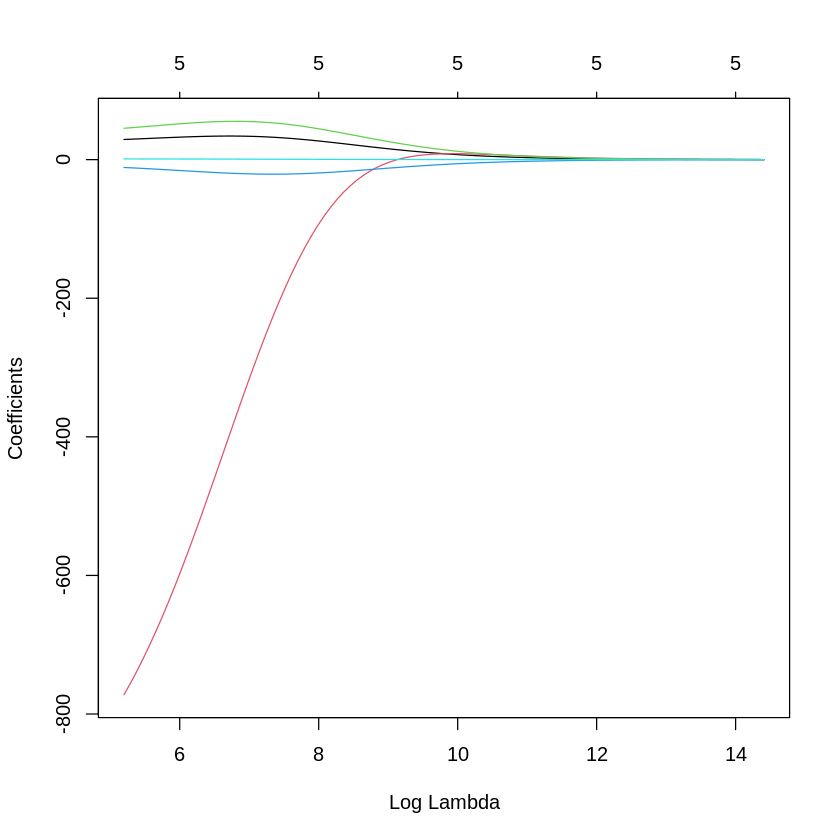

In [ ]:

x <- model.matrix(conteo ~ ., data = train_data)
# para remover el intercepto
x <- x[, -1]
y <- train_data$conteo


fitridge <- glmnet(x, y, alpha = 0)

# Ver la variacion de los coeficientes con el lambda
plot(fitridge, xvar="lambda")


foundridge <- cv.glmnet(x, y, alpha = 0, nfolds = 5)

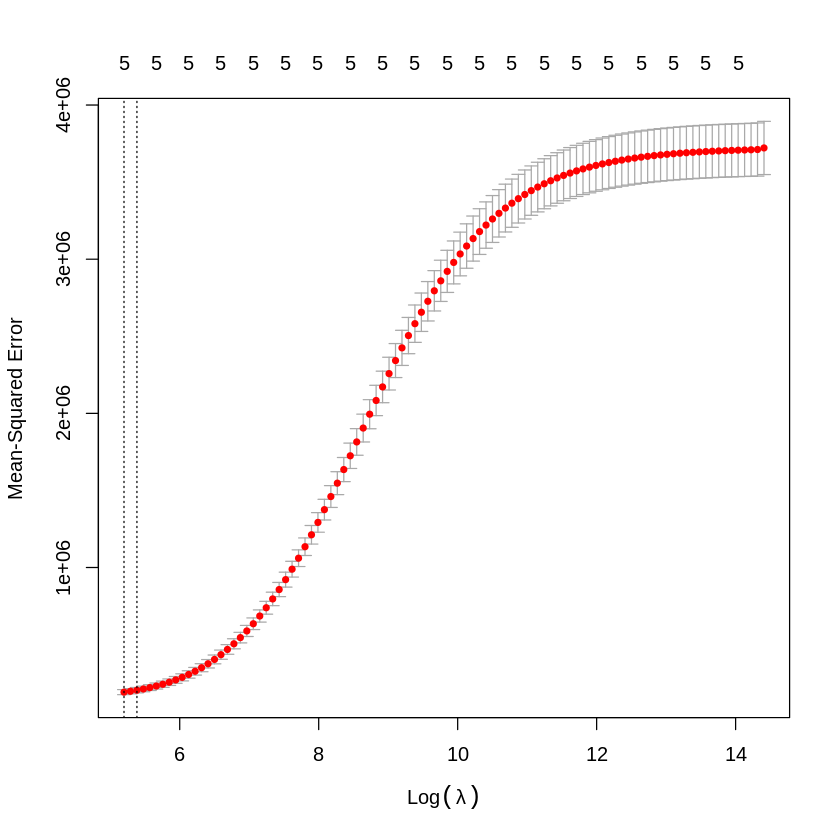

In [ ]:
plot(foundridge)

In [ ]:
#veo los lambda minimos
foundridge$lambda.1se

[1] 217.9361

In [ ]:
foundridge$lambda.min

[1] 180.9344

In [ ]:

x_test <- model.matrix(conteo ~ ., data = test_data)[, -1]

x_test <- x_test[, colnames(x)]
y_test <- test_data$conteo


predicciones <- predict.glmnet(fitridge, newx = x_test, s = foundridge$lambda.min)

In [ ]:
erroresridge=sqrt(mean((predicciones-y_test)^2))

In [ ]:
erroresridge

[1] 370.7341

Punto 4 - lasso

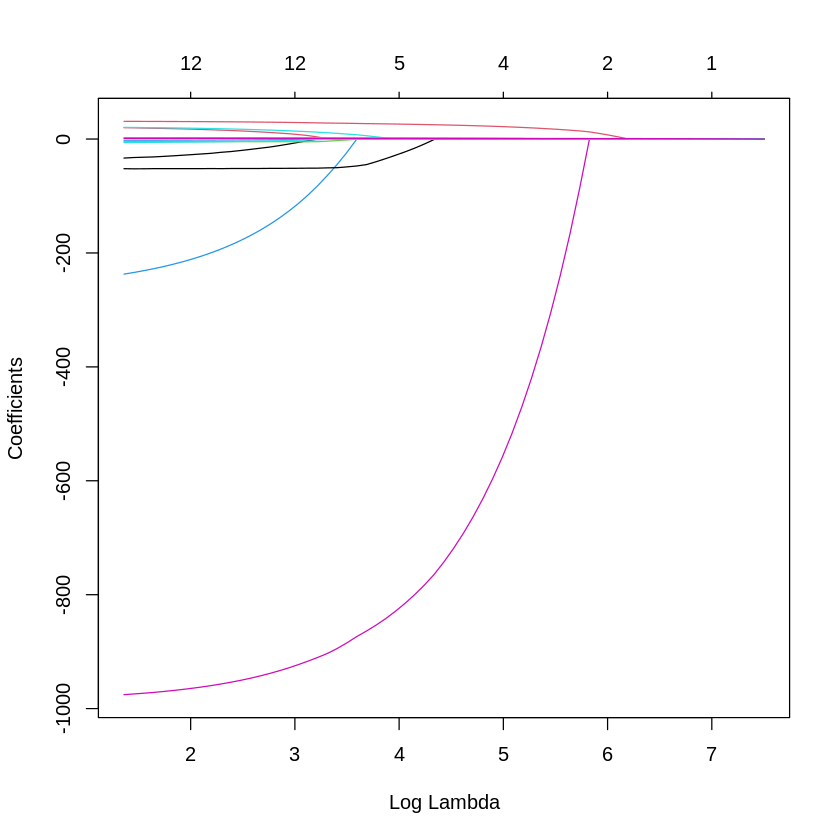

In [ ]:


fitlasso <- glmnet(x, y, alpha = 1)


plot(fitlasso, xvar="lambda")


foundlasso <- cv.glmnet(x, y, alpha = 0, nfolds = 5)

In [ ]:
#veo los lambda minimos
foundlasso$lambda.1se

[1] 239.1847

In [ ]:
foundlasso$lambda.min

[1] 180.9344

In [ ]:

x <- model.matrix(conteo ~ ., data = train_data)

x <- x[, -1]
y <- train_data$conteo

fitlasso <- glmnet(x, y, alpha = 1)

foundlasso <- cv.glmnet(x, y, alpha = 1, nfolds = 5)

x_test <- model.matrix(conteo ~ ., data = test_data)[, -1]


x_test <- x_test[, colnames(x)]

y_test <- test_data$conteo


predicciones2 <- predict.glmnet(fitlasso, newx = x_test, s = foundlasso$lambda.min)

In [ ]:
erroreslasso=sqrt(mean((predicciones2-y_test)^2))

In [ ]:
erroreslasso

[1] 337.2882

PUNTO 5 ELASTIC-NET

In [ ]:
# aqui hago redes elasticas de 0.1 a 0.9
for (i in 1:10){
  assign(paste("found", i, sep=""), cv.glmnet(x, y, nfolds=5,
                                              alpha=i/10,))}

In [ ]:
min(foundridge$cvm)

[1] 208371.8

In [ ]:
min(found1$cvm)

[1] 152315

In [ ]:
min(found2$cvm)

[1] 150815.9

In [ ]:
min(found3$cvm)

[1] 152976.3

In [ ]:
min(found4$cvm)

[1] 152193.1

In [ ]:
min(found5$cvm)

[1] 155318.6

In [ ]:
min(found6$cvm)

[1] 154128.3

In [ ]:
min(found7$cvm)

[1] 158166.2

In [ ]:
min(found8$cvm)

[1] 154686.3

In [ ]:
min(found9$cvm)

[1] 152173.8

In [ ]:
elastic1<-glmnet(x,y,alpha = 0.1)
coef(elastic1,s=found2$lambda.1se)

6 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept)  192.489798
dia           23.074468
laboral     -887.866501
temp          35.111349
viento        -5.045375
registrado     1.119442

In [ ]:
predicciones3 <- predict.glmnet(elastic1, x_test, s = elastic1$lambda.min)

In [ ]:
 erroreselastic=sqrt(mean((predicciones3-x_test[,1])^2))

In [ ]:
erroreselastic

[1] 4774.022

6 PUNTO - MEJOR MODELO

EL MEJOR MODELO FUE EL MODELO 01 ya que tiene el RMSE mas bajo con los valores de prueba RMSE=332.93 Y R2 = 0.9712